In [1]:
%matplotlib inline
from pathlib import Path
from imgseries import ImgSeries, ImgStack, GreyLevel, GreyLevelResults

**NOTE**: This notebook only shows the non-interactive GreyLevel tools. See *GreyLevel_Interactive.ipynb* for interactive options.

**NOTE**: the main (numbered) sections are independent of each other

In [2]:
# Define where images are stored, here distributed among two folders
basefolder = Path('../data')
folders = [basefolder / folder for folder in ('img1', 'img2')]

# 1) Minimal analysis

## Load images

In [3]:
images = ImgSeries(folders, savepath=basefolder)

# load pre-defined transforms (see ImgSeries for how to define those)
images.load_transforms('for-tests-do-not-modify/Img_Transform')
images

ImgSeries, data length [50]
-- corrections: []
-- transforms: ['rotation', 'crop']
from FileSeries in ../data / ['img1', 'img2'], 50 files]

## Analysis

In [4]:
# Save results in untracked folder to avoid git tracking test files
gl = GreyLevel(images, savepath='../data/untracked_data/')

The line below assumes that analysis zones have already been defined and saved in the metadata file (see details further below)

<Axes: title={'center': 'Analysis Zones (img #0)'}>

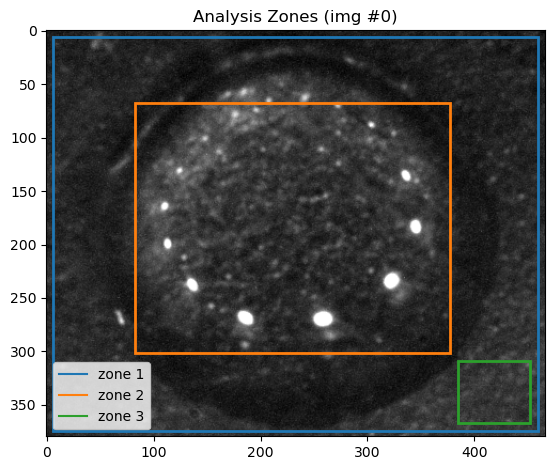

In [5]:
# Load pre-defined zones, see below how to define them directly
# NOTE: if zones not defined, the whole image is used as default
gl.zones.load('../for-tests-do-not-modify/Img_GreyLevel')
gl.zones.show()

Now, run analysis on these zones.

In [6]:
gl.analyze(num=10)

{'glevels': [77.97502477227415, 87.50754744314067, 85.83189655172414],
 'num': 10}

In [7]:
gl.run()

100%|██████████| 50/50 [00:00<00:00, 171.99it/s]


Note that for large numbers of images, it can be faster to distribute computation across multiple computer cores:

In [8]:
gl.run(parallel=True)  # has some startup delay due to multiprocessing initiation

100%|██████████| 50/50 [00:03<00:00, 13.79it/s]


Results are stored in the `results.data` attribute, which is a pandas DataFrame (times are automatically extracted from image creation date, but can be modified, see further below)) 

In [9]:
gl.results.data.tail()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
45,img2,img-00655.png,1.696408e+09,78.030688,87.377633,85.383621
46,img2,img-00656.png,1.696408e+09,78.035493,87.354730,85.380578
47,img2,img-00657.png,1.696408e+09,78.022582,87.328147,85.288032
48,img2,img-00658.png,1.696408e+09,78.064372,87.330972,85.407961
49,img2,img-00659.png,1.696408e+09,78.025805,87.272099,85.237323


Plot grey level of every zone as a function of time:

<Axes: xlabel='time (unix)'>

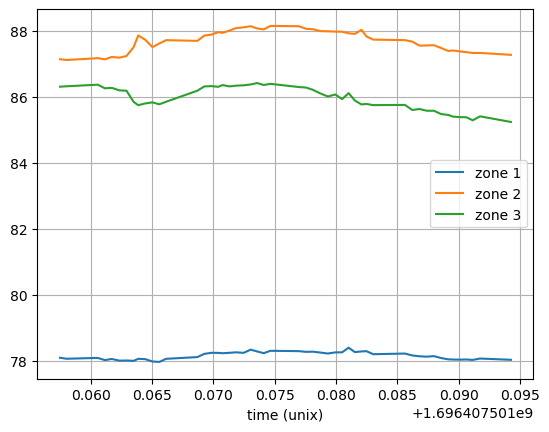

In [10]:
gl.results.data.set_index('time (unix)').filter(like='zone').plot(grid=True)

Save data in a tsv (tab-separated value) file, using default filename (filename can be set as a parameter if necessary, see further below). Metadata including zone info, path info, and code version info is also saved in a .json file at the same time. 

Before saving, make sure the timing info is correct for all images. If not, correct timing info, re-run the analysis, and call `results.save()`.

In [11]:
gl.results.save()

# 2) Defining and viewing analysis zones

See Interactive notebook

# 3) Analyze only subset of images

In [12]:
images = ImgSeries(folders, savepath=basefolder)
images.load_transforms('for-tests-do-not-modify/Img_Transform')
gl = GreyLevel(images, savepath='../data/untracked_data/')
gl.zones.load('../for-tests-do-not-modify/Img_GreyLevel')

In [13]:
gl.run(start=10)  # Analyze only from image #10
gl.results.data.head()

100%|██████████| 40/40 [00:00<00:00, 224.02it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
10,img1,img-00620.png,1.696408e+09,77.975025,87.507547,85.831897
11,img1,img-00621.png,1.696408e+09,77.961618,87.616138,85.772312
12,img1,img-00622.png,1.696408e+09,78.055753,87.717789,85.850406
13,img1,img-00623.png,1.696408e+09,78.108121,87.696378,86.184331
14,img1,img-00624.png,1.696408e+09,78.206219,87.856106,86.315162


In [14]:
gl.run(end=25)  # Analyze only up to image #25, not included
gl.results.data.tail()

100%|██████████| 25/25 [00:00<00:00, 227.38it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
20,img1,img-00630.png,1.696408e+09,78.236608,88.106171,86.348631
21,img1,img-00631.png,1.696408e+09,78.333095,88.140388,86.374493
22,img1,img-00632.png,1.696408e+09,78.279187,88.071940,86.417343
23,img1,img-00633.png,1.696408e+09,78.226813,88.044314,86.358519
24,img1,img-00634.png,1.696408e+09,78.299106,88.149268,86.393256


In [15]:
gl.run(skip=5)  # Analyze only every 5-th image
gl.results.data.head()

100%|██████████| 10/10 [00:00<00:00, 218.61it/s]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.696408e+09,78.087670,87.139910,86.306542
5,img1,img-00615.png,1.696408e+09,77.999994,87.187266,86.194980
10,img1,img-00620.png,1.696408e+09,77.975025,87.507547,85.831897
15,img1,img-00625.png,1.696408e+09,78.237820,87.885151,86.324037
20,img1,img-00630.png,1.696408e+09,78.236608,88.106171,86.348631


# 4) Load analysis data a posteriori

## Load results without images

In [16]:
# Here, the savepath is where the results have been stored with save()
results = GreyLevelResults(savepath='../data/for-tests-do-not-modify/')

In [17]:
results.load()
results.data.tail()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
45,img2,img-00655.png,1.696408e+09,78.030688,87.377633,85.383621
46,img2,img-00656.png,1.696408e+09,78.035493,87.354730,85.380578
47,img2,img-00657.png,1.696408e+09,78.022582,87.328147,85.288032
48,img2,img-00658.png,1.696408e+09,78.064372,87.330972,85.407961
49,img2,img-00659.png,1.696408e+09,78.025805,87.272099,85.237323


In [18]:
results.metadata

{'path': ['/Users/olivier.vincent/Python-OV/imgseries/data/untracked_data'],
 'folders': ['../img1', '../img2'],
 'zones': {'zone 1': [6, 6, 454, 369],
  'zone 2': [83, 68, 295, 234],
  'zone 3': [385, 310, 68, 58]},
 'function': 'numpy.mean',
 'time (utc)': '2024-02-19 17:24:12',
 'transforms': {'grayscale': {},
  'rotation': {'angle': 22.765009107511496},
  'crop': {'zone': [159, 171, 467, 380]},
  'filter': {},
  'subtraction': {},
  'threshold': {}},
 'code version': {'skimage': {'status': 'not a git repository',
   'tag': 'v0.19.3'},
  'imgseries': {'hash': 'a991c82340d9b14df2ebe976bb30003932800062',
   'status': 'dirty'},
  'imgbasics': {'status': 'not a git repository', 'tag': 'v0.3.0'},
  'filo': {'hash': '150574b5ae82c74d0c500b3fdb494e8f9c7631f7',
   'status': 'clean',
   'tag': 'v1.1.5'},
  'matplotlib': {'status': 'not a git repository', 'tag': 'v3.7.0'},
  'numpy': {'status': 'not a git repository', 'tag': 'v1.23.5'}}}

# 5) Connect results to image series (e.g. for inspection/visualization)

In [19]:
images = ImgSeries(folders, savepath=basefolder)
gl = GreyLevel(images)

# Line below is equivalent to call results.load() and images.load_transforms,
# except that the transforms are taken directly from the results metadata.
gl.regenerate(filename='for-tests-do-not-modify/Img_GreyLevel')

In [20]:
images.active_transforms

['rotation', 'crop']

In [21]:
print('Image Crop -----------------------', gl.img_series.crop.zone)
print('Image Crop (same as above) -------', gl.results.metadata['transforms']['crop']['zone'])
print('')
print('Image Rotation -------------------', gl.img_series.rotation.data)
print('Image Rotation (same as above) ---', gl.results.metadata['transforms']['rotation'])
print('')
print('Analysis Zones -------------------', gl.zones.data['zone 2'])
print('Analysis Zones (same as above) ---', gl.results.metadata['zones']['zone 2'])

gl.results.data.head()

Image Crop ----------------------- [159, 171, 467, 380]
Image Crop (same as above) ------- [159, 171, 467, 380]

Image Rotation ------------------- {'angle': 22.765009107511496}
Image Rotation (same as above) --- {'angle': 22.765009107511496}

Analysis Zones ------------------- [83, 68, 295, 234]
Analysis Zones (same as above) --- [83, 68, 295, 234]


,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.696408e+09,78.087670,87.139910,86.306542
1,img1,img-00611.png,1.696408e+09,78.058003,87.116080,86.319473
2,img1,img-00612.png,1.696408e+09,78.083098,87.170882,86.367140
3,img1,img-00613.png,1.696408e+09,78.015824,87.136491,86.258114
4,img1,img-00614.png,1.696408e+09,78.051031,87.207576,86.272059


Once the analysis is regenerated, all the tools associated with images (inspection, showing, animation, etc.) are available:

(<Axes: title={'center': 'img #25'}>, <Axes: >)

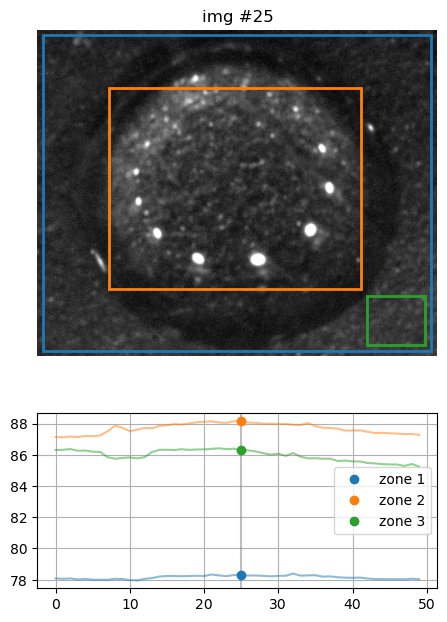

In [22]:
gl.show(num=25)

# 6) Load / save with custom filenames

In [23]:
images = ImgSeries(folders, savepath=basefolder)
gl = GreyLevel(images, savepath='../data/untracked_data')
gl.regenerate(filename='../for-tests-do-not-modify/Img_GreyLevel')

Loading and saving data can accept custom filenames as arguments, without extensions (they are added automatically, with `.tsv` for analysis data, and `.json` for metadata, e.g. (lines below should follow a `gl.run()` so that `gl.results.data` is defined):

In [24]:
gl.results.save('Img_GreyLevel_SavingTest')  # generates both .json and .tsv files

In [25]:
gl.results.load('Img_GreyLevel_SavingTest')  # loads from .tsv file
gl.results.data.head()

,folder,filename,time (unix),zone 1,zone 2,zone 3
num,,,,,,
0,img1,img-00610.png,1.696408e+09,78.087670,87.139910,86.306542
1,img1,img-00611.png,1.696408e+09,78.058003,87.116080,86.319473
2,img1,img-00612.png,1.696408e+09,78.083098,87.170882,86.367140
3,img1,img-00613.png,1.696408e+09,78.015824,87.136491,86.258114
4,img1,img-00614.png,1.696408e+09,78.051031,87.207576,86.272059
